In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
import matplotlib.tri as tri
import matplotlib.pylab as pl

from cycler import cycler

38.61075146455229
38.593075328090215
38.631338844347994
38.681854606106384
38.69423706430247
38.88155993936216
39.99729275999579
[0.  0.1 0.3 0.7 1.  2.  5. ] [1.e-02 1.e-01 1.e+00 1.e+01 5.e+01 1.e+02 1.e+03]
38.61075146455229
38.840177307723565
40.70310356184027
45.83191473828159
49.57442082938455
58.3248092167005
60.69212144983534
[0.  0.1 0.3 0.7 1.  2.  5. ] [1.e-02 1.e-01 1.e+00 1.e+01 5.e+01 1.e+02 1.e+03]
38.61075146455229
40.215719350766825
45.67728108481508
51.03744545903046
52.186654271731264
56.41160316220609
65.39852429676748
[0.  0.1 0.3 0.7 1.  2.  5. ] [1.e-02 1.e-01 1.e+00 1.e+01 5.e+01 1.e+02 1.e+03]


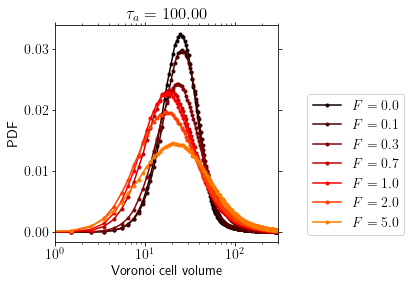

In [4]:
# mpl.rcParams.update({'font.size': 14, 'usetex': True})
mpl.rcParams.update({'font.size':14, 'text.usetex':True})
# print(mpl.rcParams.keys)
fig,ax=plt.subplots(1,1,figsize=(4,4))
# ax.set_prop_cycle(cycler('color', plt.cm.RdBu))
fpath='../../data/SAAOUP/'
ind=4
colors = pl.cm.hot(np.linspace(0,1,12))

for (name,tp) in [('low',0.01),('mid',1.0), ('high',100)]:
    vcv=[]
    Fs=[]
    Tas=[]
    vcv_eq=0
    count=0
    ax.clear()
    for fname in os.listdir(fpath+'VCV/'):
        if 'VCV' in fname and '.npz' in fname:
            T= float(fname.split('_')[ind].replace('T',''))
            F=float(fname.split('_')[ind+1].replace('F',''))
            Ta=float(fname.split('_')[ind+2].replace('Ta',''))
            kb=float(fname.split('_')[ind+7].replace('kb',''))
            Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
            R0=float(fname.split('_')[ind+4].replace('R0',''))
            dt=float(fname.split('_')[ind+8].replace('dt',''))
            # print(T,F,Ta,Esoft,R0)

            npzfile=np.load(fpath+'VCV/'+fname)
            Fs.append(F)
            Tas.append(Ta)
            
            vcv_avg=simps(npzfile['hist']*npzfile['bins'], npzfile['bins'])
            
            vcv.append(vcv_avg)
            
            if F==0: vcv_eq=vcv_avg
            if F==0.0 or Ta==tp:
                ax.plot(npzfile['bins'], npzfile['hist'],'.-', label='$F={:.1f}$'.format(F),color=colors[count])
                count+=1
                ax.set_title('$\\tau_a={:.2f}$'.format(Ta))
                print(vcv_avg)
    ax.legend(loc='lower left',bbox_to_anchor=(1.1,0))
    ax.semilogx()
    ax.set_xlim(1,300)
    ax.set_ylabel('PDF')
    ax.set_xlabel('Voronoi cell volume')
    print(np.unique(Fs),np.unique(Tas))
    fig.savefig(fpath+'plots/VCV_{}Ta.png'.format(name),bbox_inches='tight', dpi=300)


/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


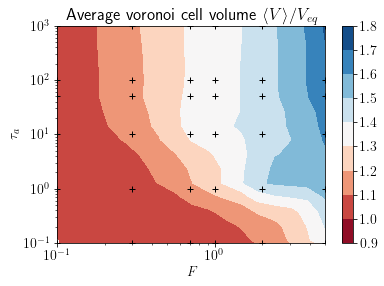

In [3]:
ax.clear()
Xi,Yi=np.meshgrid(np.geomspace(0.05,5,20),np.logspace(-2,3,20))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,np.around(np.array(vcv)/vcv_eq, 2))
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.arange(0.9,1.9,0.1),cmap='RdBu')
plt.colorbar()
plt.contour(Xi, Yi, Zi, levels=[1.])
plt.plot(Fs,Tas,'k+')
plt.loglog()
plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
plt.xlim(1e-1,5)
plt.ylim(1e-1,1e3)
plt.title('Average voronoi cell volume $\\langle V\\rangle/V_{eq}$')
plt.savefig(fpath+'/plots/normVCV_contour.png', dpi=300, bbox_inches='tight')